## Explorando Novos Dados

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl

# Carregamento da base de dados
base = pd.read_csv(
  r'\\wsl.localhost\Ubuntu\home\moiss\src_\data_science\some_projects\inadimp\data\chapter_1_cleaned_data.csv'
  )

print("Lines:",base.shape[0])
print("Columns:",base.shape[1])

Lines: 26664
Columns: 30


In [6]:
base.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,False,False,False,True
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,False,False,False,True
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,False,False,False,True
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,False,False,False,True
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,False,False,False,True
5,ceae2946-47e4,50000,1,1,2,37,0,0,0,0,...,657,1000,1000,800,0,graduate school,True,False,False,False
6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,0,...,38000,20239,13750,13770,0,graduate school,True,False,False,False
7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,0,...,0,581,1687,1542,0,university,False,False,False,True
8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,0,...,432,1000,1000,1000,0,high school,False,True,False,False
9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,1122,0,0,high school,False,True,False,False


In [7]:
# Relacionando as colunas de pagamento em um alista para estudo
pay_feats = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5']
base[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764
std,1.126769,1.198640,1.199165,1.167897,1.131735
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000


In [8]:
# Contagem de pagamentos ordenados por index
base[pay_feats[0]].value_counts().sort_index()

# Veja que a maioria das contas estão em dia ou com poucos meses de atrasos em seus pagamentos.

PAY_1
-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: count, dtype: int64

In [9]:
# Criando um array de 11 núemros de 0.5 de intervalo
pay_1_bins = np.array(range(-2, 10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

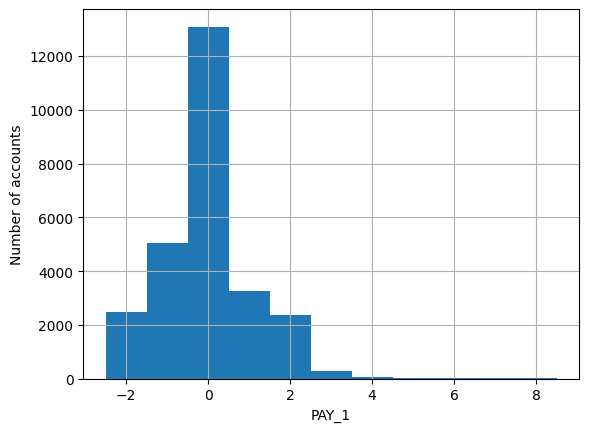

In [10]:
# Histograma de PAY_1
base[pay_feats[0]].hist(bins=pay_1_bins)
mpl.xlabel('PAY_1')
mpl.ylabel('Number of accounts');

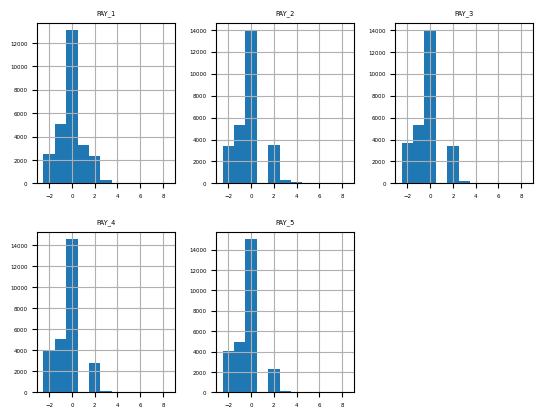

In [14]:
mpl.rcParams['font.size'] = 4
base[pay_feats].hist(bins=pay_1_bins,layout=(2,3));

# Veja que após PAY_1, as demais características (colunas), possuem dados estranhos. 
# Considerando: {
  # pay2: agosto,
  # pay3: julho,
  # pay4: junho,
  # pay5: maio  
# } 

# para todos eles, o status 1 deveria estar igual ou menor ao status zero e os demais, após 1, deveriam estar
# iguais ou menores que 1.
# Não há como uma conta atrasar o pagamento até o status 2 sem passar pelo status 1. Ou seja para que o status 2 tenha apontamento de 
# dívida, o status 1 deveria ter também.

In [22]:
# Examinando com mais detalhes as contas com atraso de 2 meses em agosto e 
# veremos qual foi o status de pagamento em julho.
# Matriz booleana para encontrar valores específicos

t = base.loc[base['PAY_2'] ==2,['PAY_2', 'PAY_3']]
t.head()

# Status de pagamento em julho (PAY_3) de contas com atraso de 2 meses 
# no pagamento em agosto (PAY_2).

# Em outras palavras, apenas a coluna PAY_1 está correta para ser usada

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2
